이벤트 설정

`event_dates` : 이벤트 리스트 (14개)

In [2]:
event_dates = ['2017-01-25', # 트럼프 행정부가 EPA(환경보호청) 직원들에게 언론 보도, 블로그 업데이트, 소셜 미디어 게시를 금지
               '2017-02-14', # 트럼프가 오바마 행정부 시절의 화석연료 산업 관련 금융 규제를 폐지하는 법안에 서명
               '2017-02-28', # 트럼프가 오바마 행정부의 'Clean Water Rule'을 폐지하는 행정명령에 서명
               '2017-03-28', # 트럼프가 오바마 행정부의 기후 정책들을 무효화하는 행정명령에 서명
               '2017-04-28', # 트럼프가 해상 석유 및 가스 시추를 확대하는 행정명령에 서명
               '2017-06-01', # 트럼프가 파리기후협정 탈퇴를 공식 발표
               '2017-10-13', # 트럼프가 캐슬린 하트넷-화이트(기후변화에 대해 회의적인 입장을 가진 인물)를 백악관 환경품질위원회 의장으로 지명
               '2018-06-19', # 트럼프 대통령은 '미국의 경제, 안보, 환경 이익을 증진하기 위한 해양 정책'에 관한 행정명령 13840에 서명
               '2018-08-21', # 트럼프 행정부의 환경보호청(EPA)이 오바마 행정부의 'Clean Power Plan'을 폐기하고 이를 대체하는 'Affordable Clean Energy Rule' 제안서를 발표
               '2019-04-12', # 트럼프가 주주들의 기후변화 관련 요구를 제한하는 행정명령에 서명
               '2019-06-20', # 트럼프 행정부의 환경보호청(EPA)이 오바마 행정부의 주요 기후변화 정책인 'Clean Power Plan'을 폐지하고 이를 대체하는 'Affordable Clean Energy' 규칙을 최종 확정
               '2019-11-04', # 트럼프가 유엔에 파리기후협정 탈퇴 의사를 공식 통보
               '2020-06-05', # 트럼프 대통령은 대서양 유일의 해양 국립기념물인 Northeast Canyons and Seamounts Marine National Monument의 보호 조치를 철회하는 선언에 서명
               '2020-11-01'] # 트럼프 대통령은 수압파쇄법(석유와 천연가스를 추출하는 특수한 시추 기술) 보호를 위한 행정명령에 서명

라이브러리 정리

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

ESG ETF 정리

In [58]:
# ESG ETF 데이터 불러오기
QCLN = yf.download('QCLN', start='2016-01-01', end='2025-02-01')
ICLN = yf.download('ICLN', start='2016-01-01', end='2025-02-01')
ERTH = yf.download('ERTH', start='2016-01-01', end='2025-02-01')
TAN = yf.download('TAN', start='2016-01-01', end='2025-02-01')
GSPC = yf.download('^GSPC', start='2016-01-01', end='2025-02-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [59]:
QCLN

Price,Close,High,Low,Open,Volume
Ticker,QCLN,QCLN,QCLN,QCLN,QCLN
Date,,,,,
2016-01-04,14.904478,14.923274,14.575565,14.819901,46100
2016-01-05,14.970263,15.092431,14.895083,15.092431,24900
2016-01-06,14.603764,14.979664,14.490993,14.866894,27100
2016-01-07,13.851957,14.350027,13.795573,14.331232,24700
2016-01-08,13.786175,14.049305,13.786175,13.955331,15000
...,...,...,...,...,...
2025-01-27,33.349998,34.099998,32.990002,33.610001,112400
2025-01-28,32.730000,33.349998,32.310001,33.349998,81300


ETF 데이터 최종본

In [61]:
# 필요한 ETF 리스트 (ACES 제외)
etfs = [QCLN, ICLN, ERTH, TAN, GSPC]
etf_names = ['QCLN', 'ICLN', 'ERTH', 'TAN', 'GSPC']

# 각 ETF에서 "Close" 데이터만 추출하고 다중 인덱스 제거
cleaned_dfs = []
for etf, name in zip(etfs, etf_names):
    df_cleaned = etf[['Close']].copy()  # "Close" 열만 선택
    df_cleaned.columns = [name]  # 컬럼 이름 변경
    cleaned_dfs.append(df_cleaned)

# 모든 ETF 데이터프레임을 하나로 병합
df = pd.concat(cleaned_dfs, axis=1)

# 인덱스(Date)를 컬럼으로 이동
df.reset_index(inplace=True)

# 수익률 계산 (단순 수익률)
returns = df.set_index('Date').pct_change().dropna()

# 동일 가중 평균 추가
returns['ETF_Portfolio'] = returns.mean(axis=1)

# Date 열을 다시 앞으로 이동
returns.reset_index(inplace=True)
returns


,Date,QCLN,ICLN,ERTH,TAN,GSPC,ETF_Portfolio
0,2016-01-05,0.004414,-0.004103,-0.001384,-0.015275,0.002012,-0.002867
1,2016-01-06,-0.024482,-0.015447,-0.019757,-0.019472,-0.013115,-0.018455
2,2016-01-07,-0.051480,-0.036611,-0.030057,-0.091552,-0.023700,-0.046680
3,2016-01-08,-0.004749,-0.009772,-0.007656,0.011486,-0.010838,-0.004306
4,2016-01-11,-0.007498,-0.012062,-0.013960,-0.035897,0.000853,-0.013713
...,...,...,...,...,...,...,...
2278,2025-01-27,-0.027697,-0.002686,-0.014532,-0.009807,-0.014581,-0.013860
2279,2025-01-28,-0.018591,-0.006284,-0.003499,-0.020108,0.009218,-0.007853
2280,2025-01-29,0.007333,0.012647,-0.001003,0.029403,-0.004679,0.008740
2281,2025-01-30,0.019715,0.017841,0.016821,0.016959,0.005275,0.015322


시장 모델 추정

In [68]:
import statsmodels.api as sm

# 2016년 데이터만 사용하여 시장 모델 추정
estimation_window = returns.loc[(returns['Date'] >= '2016-01-01') & (returns['Date'] <= '2016-12-31')].copy()

# ETF별 α, β 추정
alpha_beta = {}

for etf in ['QCLN', 'ICLN', 'ERTH', 'TAN']:
    X = estimation_window[['GSPC']]  # 시장 수익률 (GSPC)
    y = estimation_window[etf]  # ETF 수익률

    X = sm.add_constant(X)  # 상수항 추가 (α)
    model = sm.OLS(y, X).fit()  # 회귀 분석 실행

    # α, β 저장
    alpha_beta[etf] = {'alpha': model.params['const'], 'beta': model.params['GSPC']}

# 결과 확인
alpha_beta


{'QCLN': {'alpha': np.float64(-0.0005539941324713336),
  'beta': np.float64(1.2853125817458724)},
 'ICLN': {'alpha': np.float64(-0.0011955391183133815),
  'beta': np.float64(1.3284960343148564)},
 'ERTH': {'alpha': np.float64(8.278935530156288e-05),
  'beta': np.float64(1.1374872595785823)},
 'TAN': {'alpha': np.float64(-0.002759824347051669),
  'beta': np.float64(1.4573966117594328)}}

AR과 CAR 계산

In [70]:
import statsmodels.api as sm

event_dates = [pd.to_datetime(date) for date in event_dates]  # 날짜 변환

# 비정상 수익률 저장
abnormal_returns = {}

for event in event_dates:
    event_day = event  # 이벤트 날짜

    abnormal_returns[event] = {}

    for etf in ['QCLN', 'ICLN', 'ERTH', 'TAN']:
        # 이벤트 윈도우 설정 (-5 ~ +5일)
        event_window = returns[(returns['Date'] >= event_day - pd.DateOffset(days=5)) & 
                               (returns['Date'] <= event_day + pd.DateOffset(days=5))].copy()

        # 시장 모델(α, β)로 기대 수익률 계산
        alpha = alpha_beta[etf]["alpha"]
        beta = alpha_beta[etf]["beta"]
        event_window['Expected_Return'] = alpha + beta * event_window['GSPC']

        # 비정상 수익률 (AR) 계산
        event_window['Abnormal_Return'] = event_window[etf] - event_window['Expected_Return']
        abnormal_returns[event][etf] = event_window[['Date', 'Abnormal_Return']]

# 결과 확인
abnormal_returns


{Timestamp('2017-01-25 00:00:00'): {'QCLN':           Date  Abnormal_Return
  263 2017-01-20         0.004481
  264 2017-01-23        -0.001026
  265 2017-01-24         0.003509
  266 2017-01-25         0.000876
  267 2017-01-26        -0.002216
  268 2017-01-27        -0.005790
  269 2017-01-30        -0.002367,
  'ICLN':           Date  Abnormal_Return
  263 2017-01-20         0.000355
  264 2017-01-23         0.004769
  265 2017-01-24        -0.002700
  266 2017-01-25        -0.002264
  267 2017-01-26        -0.006171
  268 2017-01-27         0.002347
  269 2017-01-30        -0.001638,
  'ERTH':           Date  Abnormal_Return
  263 2017-01-20         0.000298
  264 2017-01-23         0.005074
  265 2017-01-24         0.004106
  266 2017-01-25         0.001423
  267 2017-01-26        -0.005385
  268 2017-01-27         0.004432
  269 2017-01-30        -0.005850,
  'TAN':           Date  Abnormal_Return
  263 2017-01-20         0.000688
  264 2017-01-23         0.002158
  265 2017-01-

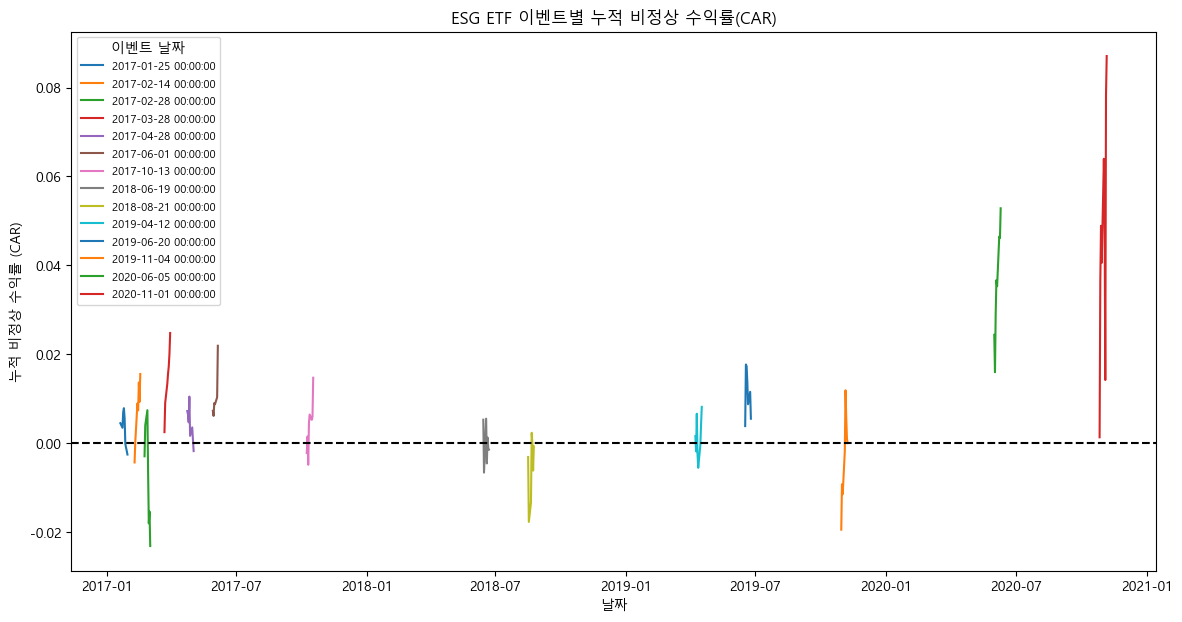

In [71]:
import matplotlib.pyplot as plt

# CAR 저장할 딕셔너리
car_results = {}

for event, ar_dict in abnormal_returns.items():
    car_results[event] = {}

    for etf, df in ar_dict.items():
        df = df.copy()
        df['CAR'] = (1 + df['Abnormal_Return']).cumprod() - 1  # 누적 복리 수익률
        car_results[event][etf] = df

# CAR 그래프 시각화
plt.figure(figsize=(14, 7))

for event, car_dict in car_results.items():
    plt.plot(car_dict['QCLN']['Date'], car_dict['QCLN']['CAR'], label=event)

plt.axhline(0, color='black', linestyle='--')
plt.xlabel('날짜')
plt.ylabel('누적 비정상 수익률 (CAR)')
plt.title('ESG ETF 이벤트별 누적 비정상 수익률(CAR)')
plt.legend(loc='best', fontsize=8, title="이벤트 날짜")
plt.show()


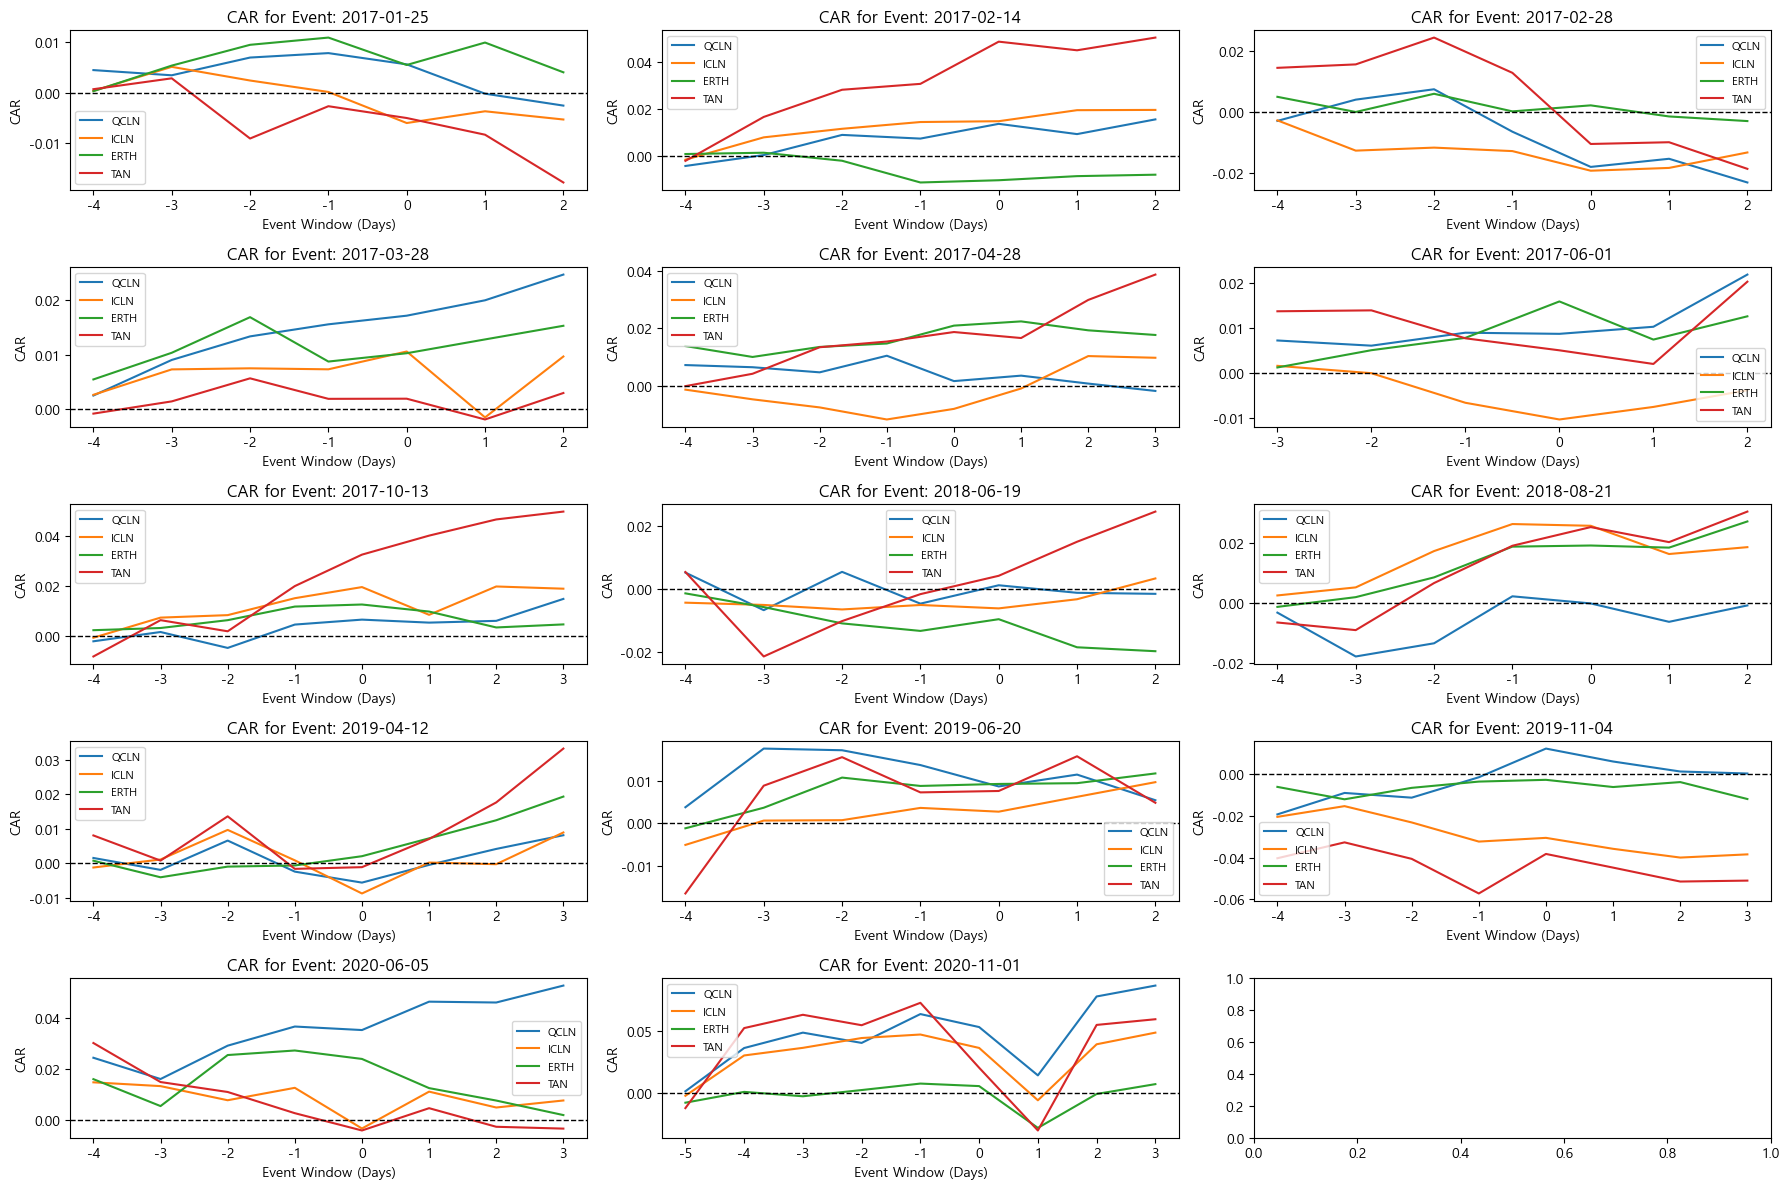

In [75]:
import matplotlib.pyplot as plt

# 서브플롯 설정
num_events = len(car_results)
fig, axes = plt.subplots(nrows=(num_events // 3) + 1, ncols=3, figsize=(18, 12))  # 3열 정렬
axes = axes.flatten()

# 이벤트별 그래프 그리기
for i, (event, car_dict) in enumerate(car_results.items()):
    ax = axes[i]
    
    for etf in ['QCLN', 'ICLN', 'ERTH', 'TAN']:
        if etf in car_dict:
            df = car_dict[etf].copy()
            
            # 이벤트 윈도우 -5 ~ +5 중 실제 존재하는 날짜만 고려하여 Days 생성
            df['Days'] = list(range(-len(df)//2, -len(df)//2 + len(df)))

            ax.plot(df['Days'], df['CAR'], label=etf)

    # 스타일 설정
    ax.axhline(0, color='black', linestyle='--', linewidth=1)  # 기준선
    ax.set_title(f'CAR for Event: {event.date()}', fontsize=12)
    ax.set_xlabel('Event Window (Days)', fontsize=10)
    ax.set_ylabel('CAR', fontsize=10)
    ax.legend(fontsize=8)

# 서브플롯 간격 조정
plt.tight_layout()
plt.show()
